In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
%cd /content/drive/MyDrive/Colab Notebooks/assign09

Mounted at /content/drive
/content
/content/drive/MyDrive/Colab Notebooks/assign09


### Data load & preprocessing 

In [3]:
from dataset.mnist import load_mnist

(train_raw_img, train_y), (test_raw_img, test_y) = load_mnist(flatten=False, normalize=False)

# reshape 
train_X = train_raw_img.reshape(len(train_raw_img.squeeze()), -1)
test_X = test_raw_img.reshape(len(test_raw_img.squeeze()), -1)

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
# preprocessing : normalization(set 0~1)
train_X = train_X.astype('float')/255
test_X = test_X.astype('float')/255

### Model

In [5]:
def entropy(y):
    epsilon = 1e-10

    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_examples = len(y)

    probabilities = class_counts / total_examples

    entropy = -np.sum(probabilities * np.log2(probabilities + epsilon))

    return entropy

In [6]:
def information_gain(y, y_left, y_right):
    entropy_y = entropy(y)
    entropy_left = entropy(y_left)
    entropy_right = entropy(y_right)
    
    n = len(y)
    n_left = len(y_left)
    n_right = len(y_right)
    
    gain = entropy_y - (n_left / n) * entropy_left - (n_right / n) * entropy_right
    
    return gain

In [7]:
def make_tree(X, y, max_depth, depth=0) :
    if depth == max_depth or len(np.unique(y)) == 1 : # stopping conditions
        return {'class' : np.argmax(np.bincount(y))} # return class
    
    best_feature, best_threshold = find_best_split(X, y)
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = X[:, best_feature] > best_threshold
    left_node = make_tree(X[left_mask], y[left_mask], max_depth, depth + 1)
    right_node = make_tree(X[right_mask], y[right_mask], max_depth, depth + 1)
    
    return {'feature': best_feature, 'threshold': best_threshold, 'left': left_node, 'right': right_node}

def find_best_split(X, y):
    best_gain = -1
    best_feature = None
    best_threshold = None
    
    for feature_idx in range(X.shape[1]):
        feature_values = X[:, feature_idx]
        thresholds = np.unique(feature_values)

        for threshold in thresholds:
            y_left = y[feature_values <= threshold]
            y_right = y[feature_values > threshold]

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            gain = information_gain(y, y_left, y_right)

            if gain > best_gain:
                best_gain = gain
                best_feature = feature_idx
                best_threshold = threshold

    return best_feature, best_threshold

def prediction(x, node) :
    if 'class' in node :
        return node['class']
    feature = node['feature']
    threshold = node['threshold']

    if x[feature] <= threshold:
        return prediction(x, node['left'])
    else:
        return prediction(x, node['right'])

### train & evaluation

In [ ]:
# early stopping

model = make_tree(train_X, train_y, max_depth=0)

In [ ]:
pred1 = np.array([prediction(x, model) for x in train_X])
pred2 = np.array([prediction(x, model) for x in test_X])

print('early stopping in train set :', np.mean(pred1==train_y))
print('early stopping in test set :', np.mean(pred2==test_y))

early stopping in train set : 0.11236666666666667
early stopping in test set : 0.1135


In [ ]:
model_1 = make_tree(train_X, train_y, max_depth=1)

pred1_1 = np.array([prediction(x, model_1) for x in train_X])
pred2_1 = np.array([prediction(x, model_1) for x in test_X])

print('early stopping in train set :', np.mean(pred1_1==train_y))
print('early stopping in test set :', np.mean(pred2_1==test_y))

early stopping in train set : 0.20411666666666667
early stopping in test set : 0.206


In [ ]:
model_2 = make_tree(train_X, train_y, max_depth=2)

pred1_2 = np.array([prediction(x, model_2) for x in train_X])
pred2_2 = np.array([prediction(x, model_2) for x in test_X])

print('early stopping in train set :', np.mean(pred1_2==train_y))
print('early stopping in test set :', np.mean(pred2_2==test_y))

early stopping in train set : 0.33665
early stopping in test set : 0.3398


In [ ]:
model_3 = make_tree(train_X, train_y, max_depth=3)

pred1_3 = np.array([prediction(x, model_3) for x in train_X])
pred2_3 = np.array([prediction(x, model_3) for x in test_X])

print('early stopping in train set :', np.mean(pred1_3==train_y))
print('early stopping in test set :', np.mean(pred2_3==test_y))

early stopping in train set : 0.4881333333333333
early stopping in test set : 0.4918


In [ ]:
model_4 = make_tree(train_X, train_y, max_depth=4)

pred1_4 = np.array([prediction(x, model_4) for x in train_X])
pred2_4 = np.array([prediction(x, model_4) for x in test_X])

print('early stopping in train set :', np.mean(pred1_4==train_y))
print('early stopping in test set :', np.mean(pred2_4==test_y))

early stopping in train set : 0.6119833333333333
early stopping in test set : 0.623


In [ ]:
model_5 = make_tree(train_X, train_y, max_depth=5)

pred1_5 = np.array([prediction(x, model_5) for x in train_X])
pred2_5 = np.array([prediction(x, model_5) for x in test_X])

print('early stopping in train set :', np.mean(pred1_5==train_y))
print('early stopping in test set :', np.mean(pred2_5==test_y))

early stopping in train set : 0.6933333333333334
early stopping in test set : 0.6995


In [ ]:
model_7 = make_tree(train_X, train_y, max_depth=7)

pred1_7 = np.array([prediction(x, model_7) for x in train_X])
pred2_7 = np.array([prediction(x, model_7) for x in test_X])

print('early stopping in train set :', np.mean(pred1_7==train_y))
print('early stopping in test set :', np.mean(pred2_7==test_y))

early stopping in train set : 0.8017
early stopping in test set : 0.7985


In [ ]:
model_10 = make_tree(train_X, train_y, max_depth=10)

pred1_10 = np.array([prediction(x, model_10) for x in train_X])
pred2_10 = np.array([prediction(x, model_10) for x in test_X])

print('early stopping in train set :', np.mean(pred1_10==train_y))
print('early stopping in test set :', np.mean(pred2_10==test_y))

early stopping in train set : 0.91215
early stopping in test set : 0.873


In [ ]:
model_15 = make_tree(train_X, train_y, max_depth=15)

pred1_15 = np.array([prediction(x, model_15) for x in train_X])
pred2_15 = np.array([prediction(x, model_15) for x in test_X])

print('early stopping in train set :', np.mean(pred1_15==train_y))
print('early stopping in test set :', np.mean(pred2_15==test_y))

early stopping in train set : 0.9952333333333333
early stopping in test set : 0.8829


### 2차원으로 축소

In [8]:
def power_iteration(X, num_iter, epsilon) :

    X_centered = X - np.mean(X, axis=0)   # Data centered
    A = np.cov(X_centered, rowvar=False)  # Construct covariance matrix

    M, N = X.shape
    convert_matrix = np.zeros((N, num_iter))  # Initializing conversion matrix

    for k in range(num_iter) :    # Power iteration
      b = np.ones(N) / np.sqrt(N) # eigen vector
      while True :
        b_next = np.dot(A, b) / np.linalg.norm(np.dot(A, b))

        if np.linalg.norm(b_next - b) < epsilon :
          break

        b = b_next

      eigen_value = np.dot(b_next, np.dot(A, b_next)) # Compute eigen value
      A -= eigen_value * np.outer(b_next, b_next)     # Update A

      convert_matrix[:, k] = b_next # Save the eigen vector in Convert matrix

    return convert_matrix

In [9]:
def visualization(proj_X, y) :
    data = proj_X[:100] # 시각화용 데이터 100개
    label = y[:100]
    
    digit_color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
    for label, x, y in zip(label, data[:, 0], data[:, 1]):
        plt.annotate(label, xy=(x, y))
        plt.scatter(x,y, color=digit_color[label])

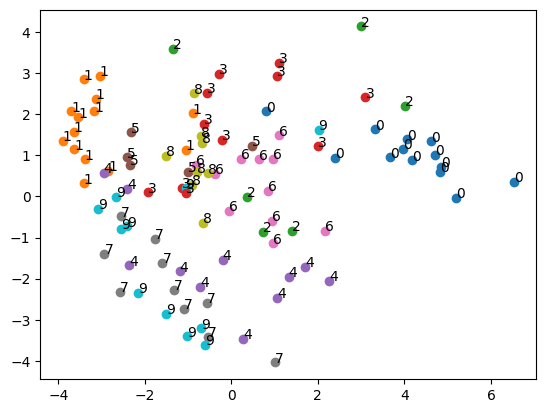

In [10]:
convert_mat = power_iteration(train_X, num_iter=2, epsilon=1e-10) # reduce to 2D
# nomaization 2 (be cetered)
train_X = train_X - train_X.mean(axis=0)
test_X = test_X - test_X.mean(axis=0)
proj_X = train_X.dot(convert_mat)

visualization(proj_X, train_y)

In [11]:
model_pj = make_tree(proj_X, train_y, max_depth=1)

pred1_pj = np.array([prediction(x, model_pj) for x in proj_X])
pred2_pj = np.array([prediction(x, model_pj) for x in test_X.dot(convert_mat)])

print('early stopping in train set :', np.mean(pred1_pj==train_y))
print('early stopping in test set :', np.mean(pred2_pj==test_y))

early stopping in train set : 0.20541666666666666
early stopping in test set : 0.2035


In [15]:
model_pj_2 = make_tree(proj_X, train_y, max_depth=2)

pred1_pj_2 = np.array([prediction(x, model_pj_2) for x in proj_X])
pred2_pj_2 = np.array([prediction(x, model_pj_2) for x in test_X.dot(convert_mat)])

print('early stopping in train set :', np.mean(pred1_pj_2==train_y))
print('early stopping in test set :', np.mean(pred2_pj_2==test_y))

early stopping in train set : 0.2966666666666667
early stopping in test set : 0.2945


In [14]:
model_pj3 = make_tree(proj_X, train_y, max_depth=3)

pred1_pj3 = np.array([prediction(x, model_pj3) for x in proj_X])
pred2_pj3 = np.array([prediction(x, model_pj3) for x in test_X.dot(convert_mat)])

print('early stopping in train set :', np.mean(pred1_pj3==train_y))
print('early stopping in test set :', np.mean(pred2_pj3==test_y))

early stopping in train set : 0.3900166666666667
early stopping in test set : 0.3891


In [12]:
model_pj2 = make_tree(proj_X, train_y, max_depth=float('inf'))

pred1_pj2 = np.array([prediction(x, model_pj2) for x in proj_X])
pred2_pj2 = np.array([prediction(x, model_pj2) for x in test_X.dot(convert_mat)])

print('early stopping in train set :', np.mean(pred1_pj2==train_y))
print('early stopping in test set :', np.mean(pred2_pj2==test_y))

early stopping in train set : 1.0
early stopping in test set : 0.3832
